# Ejemplo de algoritmos basados en el concepto de densidad - DBSCAN

En este ejemplo mostraremos un sencillo codigo para ilustrar el algoritmo de clustering basado en el concepto de densidad DBSCAN y como este puede utilizarse en problemas de análisis cluster.

Para este ejemplo utilizaremos un dataset simulado, para poder ver cómodamente el resultado de la ejecución de este tipo de algoritmos.

## Generación de datos utilizando simulación
Simulamos dos muestras aleatorias de tamaño $n=20$ de dos normales bivariantes con media $\mu_1=(1,1)$ en un grupo y $\mu_2=(-1,-1)$ en el otro grupo. Notese que la matriz de varianza-covarianza es la identidad. Además de lo anterior, vamos a generar un outlier en la posición (-2, 2) para ver como se comporta el algoritmo frente a él.

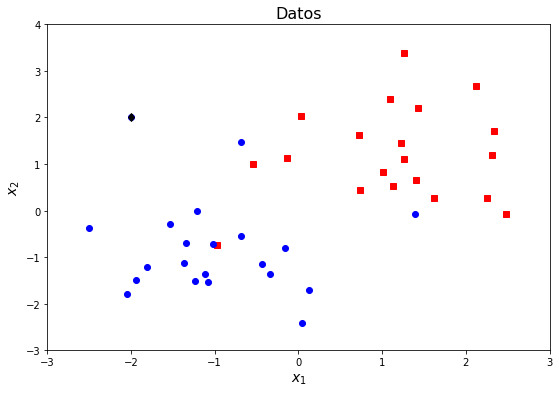

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(10) # Fijamos la semilla para la reproducibilidad de los resultados
x1 = np.random.standard_normal((20, 2)) + np.ones((20, 2))
x2 = np.random.standard_normal((20, 2)) - np.ones((20, 2))
x3 = np.array([[-2, 2]]) # Añadimos también un outlier en (-2, 2)
X = np.concatenate((x1, x2, x3), axis=0)

# Dibujamos los datos simulados, elejiremos un color para cada muestra
plt.figure(figsize=(9, 6))
plt.plot(X[:20, 0], X[:20, 1], 'rs')
plt.plot(X[20:, 0], X[20:, 1], 'bo')
plt.plot(X[40:, 0], X[40:, 1], 'kd')
plt.title("Datos", fontsize=16)
plt.xlabel(r"$x_1$", fontsize=14)
plt.ylabel(r"$x_2$", fontsize=14)
plt.xlim(-3, 3)
plt.ylim(-3, 4)
plt.show()

## Ejecución del algoritmo DBSCAN

Para ejecutar el algoritmo DBSCAN vamos a hacer uso de la librería Python Scikit-learn (sklearn).

Notse que este algoritmo requiere especificar dos hiperparámetros: *minPts* (número mínimo de elementos necesarios para poder constituir un cluster)  y *epsilon* (distancia máxima entre dos elementos para ser considerados vecinos).

In [ ]:
from sklearn.cluster import DBSCAN
import numpy

minPts = 3
epsilon = 1

dbscan = DBSCAN(eps=epsilon, min_samples=minPts)
labels = dbscan.fit_predict(X)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

print ('Number of clusters %d' % n_clusters)

Number of clusters 2


In [ ]:
# Mostramos los grupos obtenidos para cada elemento del dataset X
labels

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, -1,  0,  0,  0,  0,  0,
        0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  0,  1,  1,  1,  1,  1,
        1,  1,  1,  0,  1,  1, -1])

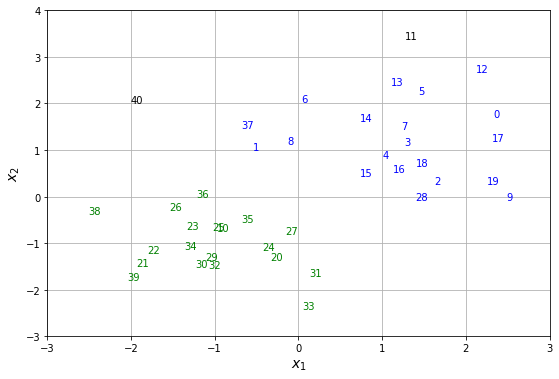

In [ ]:
# Representación gráfica de la solución
# He comentado el código original que es susceptible de mejora
import numpy
#colors = numpy.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])
#colors = numpy.hstack([colors] * 20)
#numbers = numpy.arange(len(X))
colors = 'bgk'
plt.figure(figsize=(9, 6))
for i in range(len(X)):
    #plt.text(X[i][0], X[i][1], numbers[i], color=colors[labels[i]]) 
    plt.text(X[i][0], X[i][1], i, color=colors[labels[i]]) 
plt.xlabel(r"$x_1$", fontsize=14)
plt.ylabel(r"$x_2$", fontsize=14)
plt.xlim(-3, 3)
plt.ylim(-3, 4)
plt.grid()
plt.show()
# Observar que el dato 40 lo identifica como un outlier